In [55]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
#obtain the dataset from the url below
#the dataset is in csv format
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_base.csv"
df = pd.read_csv(url, header=None)

In [3]:
#add headers to the dataframe
header = ["Manufacturer", "Category", "Screen", "GPU", "OS", "CPU_core", "Screen_Size_cm", "CPU_frequency", "RAM_GB", "Storage_GB_SSD", "Weight_kg", "Price"]
df.columns = header
df.head(10)

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
5,Dell,3,Full HD,1,1,5,39.624,1.6,8,256,2.2,1016
6,HP,3,Full HD,3,1,5,39.624,1.6,8,256,2.1,1117
7,Acer,3,IPS Panel,2,1,5,38.1,1.6,4,256,2.2,866
8,Dell,3,Full HD,1,1,5,39.624,2.5,4,256,2.3,812
9,Acer,3,IPS Panel,3,1,7,38.1,1.8,8,256,2.2,1068


##**Identify missing values**
###**Convert "?" to NaN**
In the car data set, missing data comes with the question mark "?". We replace "?" with NaN (Not a Number), Python's default missing value marker for reasons of computational speed and convenience.

In [4]:
#replace ? symbol with NaN value so that dropna() can remove missing values
df.replace('?', np.nan, inplace=True)
df.head(10)

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
5,Dell,3,Full HD,1,1,5,39.624,1.6,8,256,2.2,1016
6,HP,3,Full HD,3,1,5,39.624,1.6,8,256,2.1,1117
7,Acer,3,IPS Panel,2,1,5,38.1,1.6,4,256,2.2,866
8,Dell,3,Full HD,1,1,5,39.624,2.5,4,256,2.3,812
9,Acer,3,IPS Panel,3,1,7,38.1,1.8,8,256,2.2,1068


In [5]:
#check the data for missing values
missing_data = df.isnull()
for col in missing_data.columns:
  print(missing_data[col].value_counts())
  print(" ")

Manufacturer
False    238
Name: count, dtype: int64
 
Category
False    238
Name: count, dtype: int64
 
Screen
False    238
Name: count, dtype: int64
 
GPU
False    238
Name: count, dtype: int64
 
OS
False    238
Name: count, dtype: int64
 
CPU_core
False    238
Name: count, dtype: int64
 
Screen_Size_cm
False    234
True       4
Name: count, dtype: int64
 
CPU_frequency
False    238
Name: count, dtype: int64
 
RAM_GB
False    238
Name: count, dtype: int64
 
Storage_GB_SSD
False    238
Name: count, dtype: int64
 
Weight_kg
False    233
True       5
Name: count, dtype: int64
 
Price
False    238
Name: count, dtype: int64
 


From the summary, we can see that two columns have missing data:
- Screen_Size_cm: 4
- Weight_kg: 5

##**Dealing with missing data**
###**Replace by frequency**
Since the column "Screen_Size_cm" contains categorical data, we will replace the missing values with the most frequent value.

In [6]:
#check for the most frequent value in the column "Screen_Size_cm"
freq_screen_size = df['Screen_Size_cm'].value_counts().idxmax()
#replace missing data with the most frequent screen size
df['Screen_Size_cm'].replace(np.nan, freq_screen_size, inplace=True)

###**Replace by mean**
The "Weight_kg" column contains continuous data. We will replace missing data with the average of the values.

In [7]:
#calculate the average of the column "Weight_kg"
avg_weight = df['Weight_kg'].astype('float').mean(axis=0)
#replace missing data with the average weight
df['Weight_kg'].replace(np.nan, avg_weight, inplace=True)

In [8]:
#check the data for missing values after handling missing data
missing_data = df.isnull()
for col in missing_data.columns:
  print(missing_data[col].value_counts())
  print(" ")

Manufacturer
False    238
Name: count, dtype: int64
 
Category
False    238
Name: count, dtype: int64
 
Screen
False    238
Name: count, dtype: int64
 
GPU
False    238
Name: count, dtype: int64
 
OS
False    238
Name: count, dtype: int64
 
CPU_core
False    238
Name: count, dtype: int64
 
Screen_Size_cm
False    238
Name: count, dtype: int64
 
CPU_frequency
False    238
Name: count, dtype: int64
 
RAM_GB
False    238
Name: count, dtype: int64
 
Storage_GB_SSD
False    238
Name: count, dtype: int64
 
Weight_kg
False    238
Name: count, dtype: int64
 
Price
False    238
Name: count, dtype: int64
 


We can see that our dataset doesn't contain missing data now.

###**Fixing the data types**

In [9]:
#check the data types
df.dtypes

,0
Manufacturer,object
Category,int64
Screen,object
GPU,int64
OS,int64
CPU_core,int64
Screen_Size_cm,object
CPU_frequency,float64
RAM_GB,int64
Storage_GB_SSD,int64


Both "Weight_kg" and "Screen_Size_cm" are seen to have the data type "Object", while both of them should be having a data type of "float". Let's fix the data type of these two columns.

In [10]:
#convert data types to float
df['Weight_kg'] = df['Weight_kg'].astype('float')
df['Screen_Size_cm'] = df['Screen_Size_cm'].astype('float')

In [11]:
#check the data types after convertions
df.dtypes

,0
Manufacturer,object
Category,int64
Screen,object
GPU,int64
OS,int64
CPU_core,int64
Screen_Size_cm,float64
CPU_frequency,float64
RAM_GB,int64
Storage_GB_SSD,int64


##**Data Standardization**
The value of Screen_size usually has a standard unit of inches. Similarly, weight of the laptop is needed to be in pounds. We'll go ahead and use the below mentioned units of conversion to modify the columns accordingly and update their names as well.

1 inch = 2.54 cm

1 kg   = 2.205 pounds

In [12]:
#convert centimetres to inches
df["Screen_Size_cm"] = df["Screen_Size_cm"]/2.54
#convert kilograms to pounds
df['Weight_kg'] = df['Weight_kg']*2.2005
#rename the columns
df.rename(columns={'Screen_Size_cm':'Screen_Size_inches'}, inplace=True)
df.rename(columns={'Weight_kg':'Weight_pounds'}, inplace=True)

##**Data Normalization**
  It is required to normalize a continuous data attribute. Let's normalize the "CPU_frequency" attribute with respect to the maximum value available in the dataset.

In [13]:
#normalize "CPU_frequency" with respect to maximum value
df['CPU_frequency'] = df['CPU_frequency']/df['CPU_frequency'].max()

In [14]:
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inches,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price
0,Acer,4,IPS Panel,2,1,5,14.0,0.551724,8,256,3.520800,978
1,Dell,3,Full HD,1,1,3,15.6,0.689655,4,256,4.841100,634
2,Dell,3,Full HD,1,1,7,15.6,0.931034,8,256,4.841100,946
3,Dell,4,IPS Panel,2,1,5,13.3,0.551724,8,128,2.684610,1244
4,HP,4,Full HD,2,1,7,15.6,0.620690,8,256,4.202955,837


##**Binning**
Let's create 3 bins for the attribute "Price"  namely "Low", "Medium" and "High".

Text(0.5, 1.0, 'Price bins')

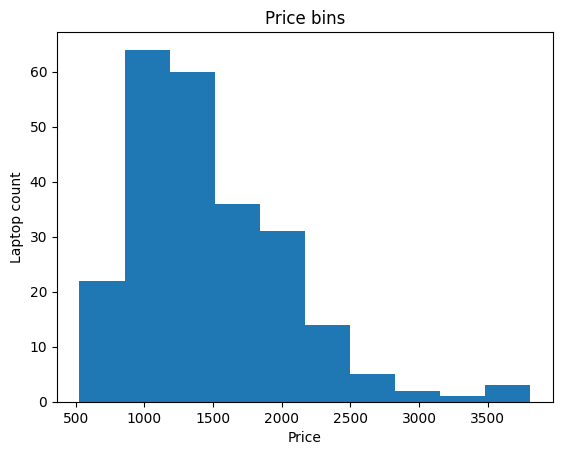

In [15]:
#plot the distribution of the attribute "price"
plt.pyplot.hist(df['Price'])

#set x and y labels and title
plt.pyplot.xlabel('Price')
plt.pyplot.ylabel('Laptop count')
plt.pyplot.title('Price bins')

In [16]:
#create a bin array
bins = np.linspace(df['Price'].min(), df['Price'].max(), 4)
#allocate group names
group_name = ['Low', 'Medium', 'High']
#group the price as low, medium or high
df['Price-binned'] = pd.cut(df['Price'], bins, labels=group_name, include_lowest=True)

Text(0.5, 1.0, 'Price bins')

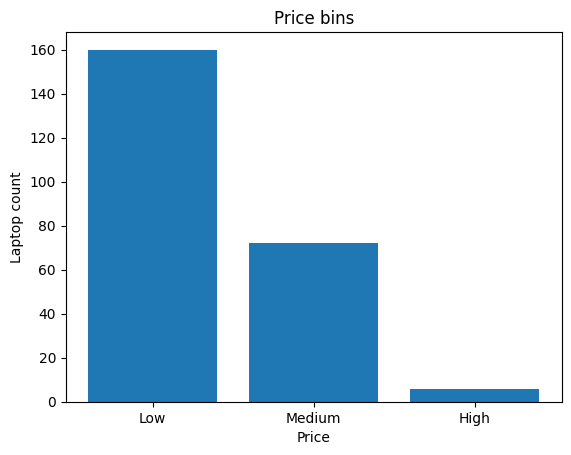

In [17]:
#plot the distribution of each bin
plt.pyplot.bar(group_name, df['Price-binned'].value_counts())

#set x and y labels and title
plt.pyplot.xlabel('Price')
plt.pyplot.ylabel('Laptop count')
plt.pyplot.title('Price bins')

##**Indicator variable**
Lets convert the "Screen" attribute of the dataset into 2 indicator variables, "Screen-IPS_panel" and "Screen-Full_HD". Then drop the "Screen" attribute from the dataset.

In [18]:
#get the indicator variable
ind_var_screen = pd.get_dummies(df['Screen'])
#rename the columns
ind_var_screen.rename(columns={'Full HD': 'Screen-Full_HD', 'IPS Panel': 'Screen-IPS_pane'}, inplace=True)
#merge the data frames 'df' and 'ind_var_screen'
df = pd.concat([df, ind_var_screen], axis=1)
#drop the original "Screen" column
df.drop('Screen', axis=1, inplace=True)

In [19]:
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inches,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_pane
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.520800,978,Low,False,True
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.841100,634,Low,True,False
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.841100,946,Low,True,False
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.684610,1244,Low,False,True
4,HP,4,2,1,7,15.6,0.620690,8,256,4.202955,837,Low,True,False


In [ ]:
df.to_csv('clean_laptops.csv', index=False)

##**Visualizing Individual Feature Patterns**

###**Continuous valued features**
Lets generate regression plots for each of the parameters "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price". We'll also print the value of correlation of each feature with "Price".

(0.0, 3974.15)

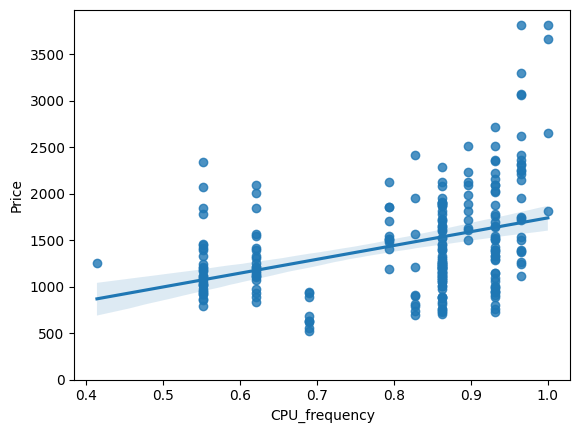

In [34]:
#CPU_frequency plot
sns.regplot(x='CPU_frequency', y='Price', data=df)
plt.ylim(0,)

(0.0, 3974.15)

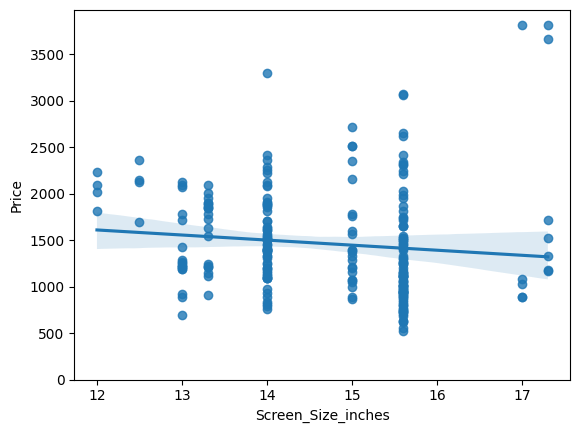

In [35]:
#Screen_Size_inches plot
sns.regplot(x='Screen_Size_inches', y='Price', data=df)
plt.ylim(0,)

(0.0, 3974.15)

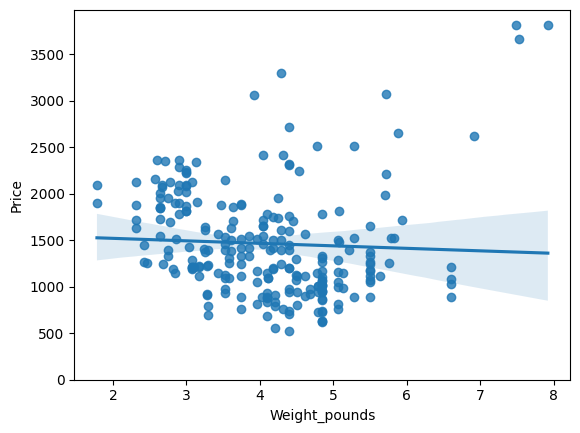

In [38]:
#Weight_pounds plot
sns.regplot(x='Weight_pounds', y='Price', data=df)
plt.ylim(0,)

In [41]:
#Correlation of each of the above features with Price
for feat in ['CPU_frequency','Screen_Size_inches','Weight_pounds']:
  print(f"The correlation of {feat} with Price is \n{df[[feat,'Price']].corr()}\n")

The correlation of CPU_frequency with Price is 
               CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000

The correlation of Screen_Size_inches with Price is 
                    Screen_Size_inches     Price
Screen_Size_inches            1.000000 -0.110644
Price                        -0.110644  1.000000

The correlation of Weight_pounds with Price is 
               Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000



We can see that "CPU_frequency" has a 36% positive correlation with the price of the laptops. The other two parameters have weak correlation with price.

###**Categorical features**
Let's generate Box plots for "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"

<Axes: xlabel='Category', ylabel='Price'>

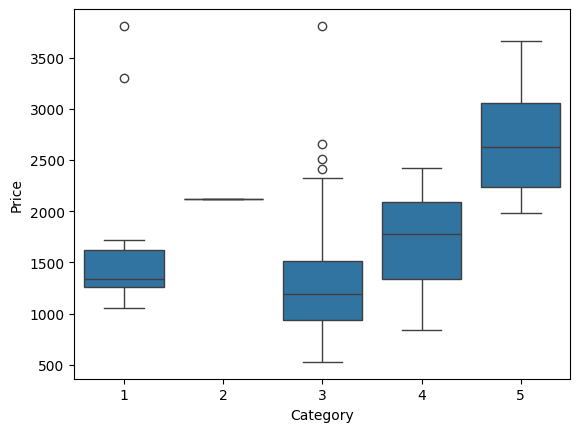

In [42]:
#Category boxplot
sns.boxplot(x='Category', y='Price', data=df)

<Axes: xlabel='GPU', ylabel='Price'>

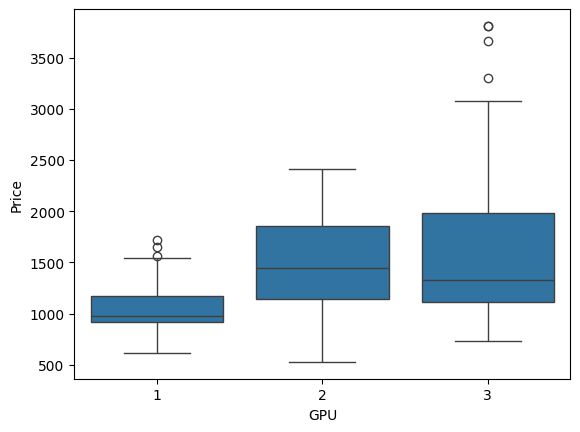

In [43]:
#GPU boxplot
sns.boxplot(x='GPU', y='Price', data=df)

<Axes: xlabel='OS', ylabel='Price'>

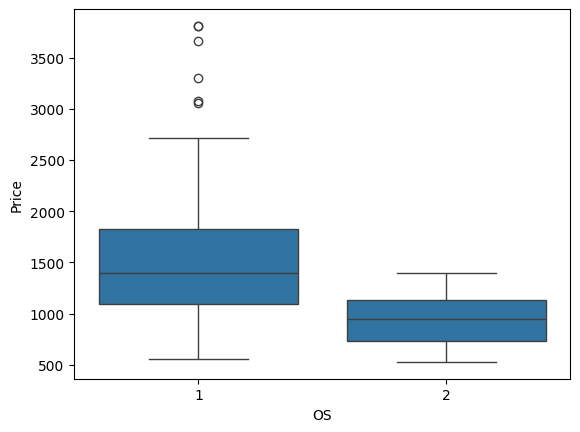

In [44]:
#OS boxplot
sns.boxplot(x='OS', y='Price', data=df)

<Axes: xlabel='CPU_core', ylabel='Price'>

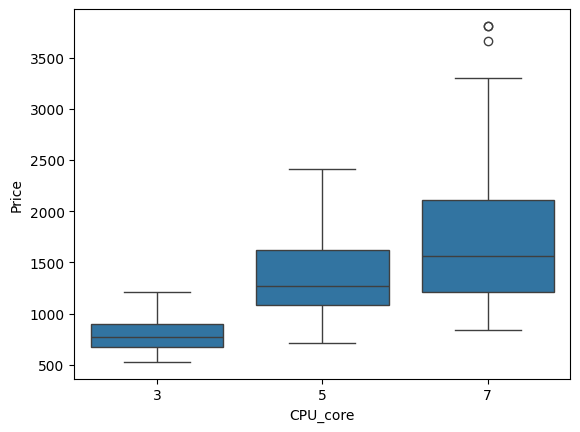

In [45]:
#CPU_core boxplot
sns.boxplot(x='CPU_core', y='Price', data=df)

<Axes: xlabel='RAM_GB', ylabel='Price'>

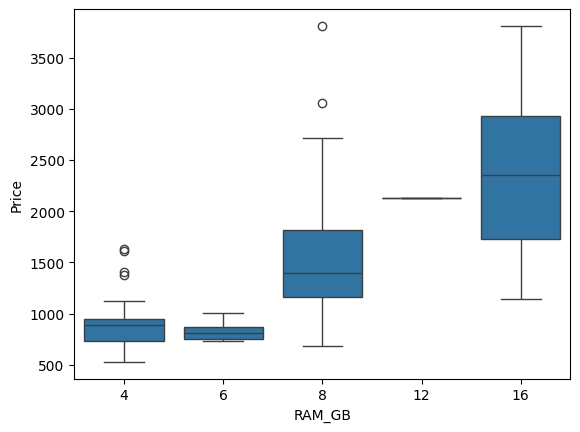

In [46]:
#RAM_GB boxplot
sns.boxplot(x='RAM_GB', y='Price', data=df)

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

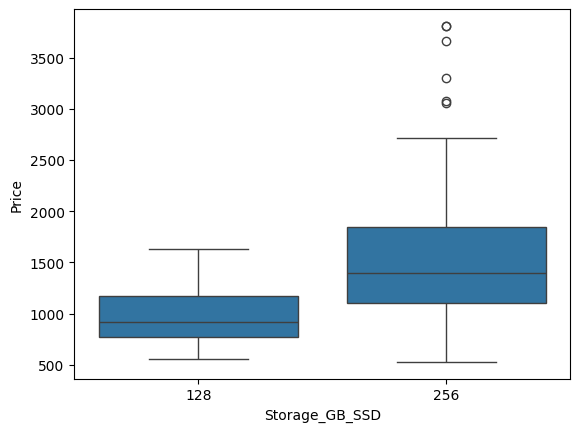

In [47]:
#Storage_GB_SSD boxplot
sns.boxplot(x='Storage_GB_SSD', y='Price', data=df)

##**Discriptive Statistical analysis**
Let us generate the statistical description of all the features being used in the data set including "object" data types as well.

In [50]:
df.describe(include='all')

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inches,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_pane
count,238,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238,238,238
unique,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,2
top,Dell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,True,False
freq,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160,161,161
mean,NaN,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.097841,1462.344538,NaN,NaN,NaN
std,NaN,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.076242,574.607699,NaN,NaN,NaN
min,NaN,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.782405,527.000000,NaN,NaN,NaN
25%,NaN,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.240236,1066.500000,NaN,NaN,NaN
50%,NaN,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.097841,1333.000000,NaN,NaN,NaN
75%,NaN,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.841100,1777.000000,NaN,NaN,NaN


##**GroupBy and Pivot table**
Let's group the parameters "GPU", "CPU_core" and "Price" to make a pivot table.

In [53]:
#create the group
df_group_one = df[['GPU','CPU_core','Price']]
df_grouped = df_group_one.groupby(['GPU','CPU_core'], as_index=False).mean()
df_grouped

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


In [54]:
#create pivot table
df_group_pivot = df_grouped.pivot(index='GPU', columns='CPU_core')
df_group_pivot

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

##**Pearson correlation and p-values**
We'll evaluate the Pearson Coefficient and the p-values for each parameter tested above to determine the parameters most likely to have a strong effect on the price of the laptops.

In [57]:
for feature in [ "CPU_frequency", "Screen_Size_inches", "Weight_pounds", "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"]:
  pearson_coef, p_value = stats.pearsonr(df[feature], df['Price'])
  print(feature)
  print(f"Pearson correlation coeficient:{pearson_coef}, p-value: {p_value}\n")

CPU_frequency
Pearson correlation coeficient:0.366665558925886, p-value: 5.5024633507134225e-09

Screen_Size_inches
Pearson correlation coeficient:-0.11064420817118284, p-value: 0.08853397846830666

Weight_pounds
Pearson correlation coeficient:-0.05031225837751543, p-value: 0.43976938534338944

Category
Pearson correlation coeficient:0.28624275581264125, p-value: 7.225696235806733e-06

GPU
Pearson correlation coeficient:0.2882981988881428, p-value: 6.166949698364282e-06

OS
Pearson correlation coeficient:-0.22172980114827384, p-value: 0.0005696642559246749

CPU_core
Pearson correlation coeficient:0.4593977773355115, p-value: 7.912950127009034e-14

RAM_GB
Pearson correlation coeficient:0.5492972971857844, p-value: 3.681560628842868e-20

Storage_GB_SSD
Pearson correlation coeficient:0.2434207552181029, p-value: 0.00014898923191724174

